# 15 plots using plotly

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Import dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# 1. Scatter plot

In [4]:
fig1 = px.scatter(df, x='sepal_length' , y='sepal_width', color="species")
fig1.show()

# 2. Line plot

In [5]:
# sort the data
df_line = df.sort_values(by=['sepal_length'])

fig2 = px.line(df_line, x='sepal_length' , y='sepal_width', color="species")
fig2.show()


# 3. Bar plot

In [6]:
# group values based on means
df_bar = df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [7]:
fig3 = px.bar(df_bar, x='species' , y='sepal_width')
fig3.show()

> seaborn does not need to make mean groups

<Axes: xlabel='species', ylabel='sepal_width'>

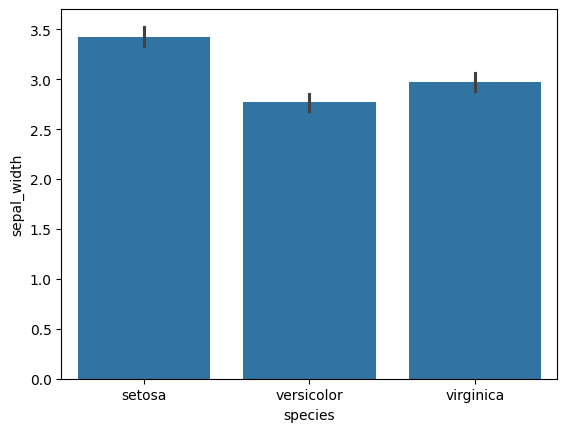

In [8]:
# seaborn does not need to make mean groups

sns.barplot(df, x="species", y= "sepal_width")

# 4. Boxplot

In [9]:
# Box plot

fig4 = px.box(df, x='species' , y='sepal_width', color = 'species')
fig4.show()


# 5. Violin plot


In [10]:
# violon plot

fig5 = px.violin(df, x='species' , y='sepal_width', color = 'species', box=True)
fig5.show()

# 6. Histogram

In [11]:
#6 histogram

fig6 = px.histogram(df, x='sepal_width',color = 'species')
fig6.show()


# 7. Pie Chart

In [12]:
# first we have to check the dataset
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [13]:
# piechart
df_pie = df['species'].value_counts().reset_index()
df_pie.columns = ['species', 'count']
fig7 = px.pie(df_pie, values='count', names='species')
fig7.show()

# 8. scatter 3D plot

In [14]:
# scatter 3d plot
fig8 = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig8.show()

# 9. Area chart

In [15]:
# area chart
df_area = df.sort_values(by=['sepal_length'])

fig9 = px.area(df_area, x='sepal_width', y='sepal_length', color='species')
fig9.show()

# 10. Bubble Chart

In [16]:
# bubble chart

fig10 = px.scatter(df, x='sepal_length', y='sepal_width', size='petal_length', color='species')
fig10.show()

# 11. Sunburst chart

In [17]:
# 11 sunburst chart
df_sunburst = df.groupby(['species', 'petal_width']).size().reset_index(name='counts')

fig11 = px.sunburst(df_sunburst, path=['species', 'petal_width'], values='counts')
fig11.show()

> Let's try another sunburst plot

In [18]:
# create sunburst plot on titanic dataset
import plotly.express as px
import seaborn as sns
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Create a sunburst plot
fig = px.sunburst(titanic, 
                  path=['sex','class', 'who', 'alive', 'alone'], 
                  values='survived' , color='sex')
# Show the plot
fig.show()

c:\Users\Awais\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\Awais\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\Awais\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and 

# 12. Parallel Coordinates plot

In [19]:
# Add a numeric species_id based on species names for coloring
df['species_id'] = df['species'].astype('category').cat.codes

# Parallel Coordinates Plot
fig12 = px.parallel_coordinates(df, color='species_id', labels={'species_id': 'species'}, color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show()

# 13. Desity contour plot

In [20]:
# Desity contour plot

fig13 = px.density_contour(df, x='sepal_length', y='sepal_width', color='species')
fig13.show()

# 14. Ternary Plot

In [21]:
# Ternary Plot

fig14 = px.scatter_ternary(df, a='sepal_length', b='sepal_width', c='petal_width', color='species')
fig14.show()

# 15. Polar chart (Radar Chart)

In [22]:
# Polar chart (Radar Chart)

df_radar = df.groupby(['species']).mean().reset_index()

fig15 = px.line_polar(df_radar, r='sepal_length', theta='species', line_close=True)
fig15.show()